In [1]:
! pip install --upgrade gitdb
! pip install nengo-dl==2.0.0
! pip install nengo==2.7.0

! pip install tensorflow==1.14
! pip install tensorflow-gpu==1.14

%tensorflow_version 1.x

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import nengo
import nengo_dl

     |████████████████████████████████| 71kB 2.1MB/s 
     |████████████████████████████████| 143kB 2.8MB/s 
     |████████████████████████████████| 399kB 8.7MB/s 
     |████████████████████████████████| 378kB 2.8MB/s 
  Found existing installation: nengo 3.0.0
    Uninstalling nengo-3.0.0:
      Successfully uninstalled nengo-3.0.0
     |████████████████████████████████| 109.2MB 93kB/s 
     |████████████████████████████████| 3.2MB 33.1MB/s 
     |████████████████████████████████| 491kB 40.8MB/s 
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0
     |████████████████████████████████| 377.0MB 48kB/s 
TensorFlow 1.x 

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

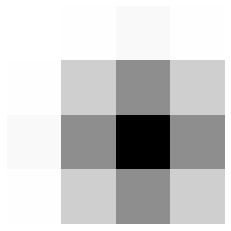

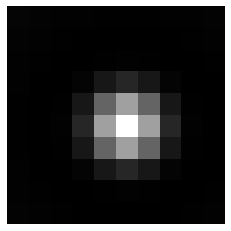

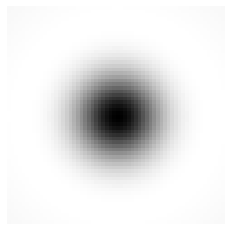

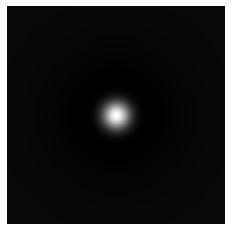

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
from scipy.ndimage import correlate
%matplotlib inline 
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
print(mnist.train.labels[0])
num_classes = mnist.train.labels.shape[1]
num_features = mnist.train.images.shape[1]
training_data = mnist.train
testing_data = mnist.test

tf.reset_default_graph()

x_input = tf.placeholder(dtype=tf.float32, shape=[None, num_features], name='x_input')
y_input = tf.placeholder(dtype=tf.float32, shape=[None, num_classes], name='actual_label')

x_in = x_input
y_in = y_input

def dog_on(n,v,p):

  nr = np.floor(n/2) # half the size
  t = p * v # std deviation of surround (s2)
  
  x,y = np.mgrid[-nr:nr,-nr:nr]
  
  H  = 10*(1/(2 * np.pi * (v**2) )) * np.exp(-( (x**2) + (y**2) )/( 2 * (v**2) ))         # gaussian for center
  K  = 10*(1/(2 * np.pi * (t**2) )) * np.exp(-( (x**2) + (y**2) )/( 2 * (t**2) ))         # gaussian for surround
  
  s1 = np.sum( np.sum(H) )
  s2 = np.sum( np.sum(K) )
  
  D = ((s2 * H) - (s1 * K))
  return D

off_midget = -(dog_on(5,0.8,6.7))     # midget off center
on_midget = dog_on(11,1.04,6.7)    # midget on center
off_parasol = -(dog_on(61,8,4.8))     # parasol off center
on_parasol = dog_on(243,10.4,4.8)  # parasol on center


plt.figure()
plt.imshow( off_midget ,cmap="gray")
plt.axis('off')

plt.figure()
plt.imshow( on_midget ,cmap="gray")
plt.axis('off')

plt.figure()
plt.imshow( off_parasol ,cmap="gray")
plt.axis('off')

plt.figure()
plt.imshow( on_parasol ,cmap="gray")
plt.axis('off')


def DoG_conv(image):

  first_img = np.reshape( image, (28,28))
  on_conv = correlate(first_img, on_filt, mode='constant')
  off_conv = correlate( first_img, off_filt, mode='constant')

  final_img = np.zeros( (first_img.shape[0], first_img.shape[1]), dtype = np.float32 )
  for i in range(first_img.shape[0]):
    for j in range(first_img.shape[1]):
      final_img[i][j] = np.maximum( on_conv[i][j], off_conv[i][j] )
  
  return np.reshape(final_img,(784,))

In [0]:
sampling_size = 100
train_set = training_data.images[:sampling_size]
test_set = testing_data.images[:sampling_size]

# midget cells

moff_train = []
print(train_set.shape)
modulus = train_set.shape[0]
for i in train_set:
  img = np.reshape(i, (28,28) )
  img = correlate(img, off_midget, mode='constant')
  moff_train.append( np.reshape( img,(784,)) )
  
mon_train = []
print(train_set.shape)
modulus = train_set.shape[0]
for i in train_set:
  img = np.reshape(i, (28,28) )
  img = correlate(img, on_midget, mode='constant')
  mon_train.append( np.reshape( img,(784,)) )

moff_test = []
print(test_set.shape)
for i in test_set:
  img = np.reshape(i, (28,28) )
  img = correlate(img, off_midget, mode='constant')
  moff_test.append( np.reshape( img,(784,)) )
  
mon_test = []
print(test_set.shape)
for i in test_set:
  img = np.reshape(i, (28,28) )
  img = correlate(img, on_midget, mode='constant')
  mon_test.append( np.reshape( img,(784,)) )

# parasol cells

poff_train = []
print(train_set.shape)
modulus = train_set.shape[0]
for i in train_set:
  img = np.reshape(i, (28,28) )
  img = correlate(img, off_parasol, mode='constant')
  poff_train.append( np.reshape( img,(784,)) )
  
pon_train = []
print(train_set.shape)
modulus = train_set.shape[0]
for i in train_set:
  img = np.reshape(i, (28,28) )
  img = correlate(img, on_parasol, mode='constant')
  pon_train.append( np.reshape( img,(784,)) )

poff_test = []
print(test_set.shape)
for i in test_set:
  img = np.reshape(i, (28,28) )
  img = correlate(img, off_parasol, mode='constant')
  poff_test.append( np.reshape( img,(784,)) )
  
pon_test = []
print(test_set.shape)
for i in test_set:
  img = np.reshape(i, (28,28) )
  img = correlate(img, on_parasol, mode='constant')
  pon_test.append( np.reshape( img,(784,)) )

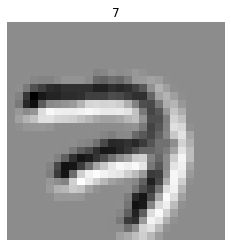

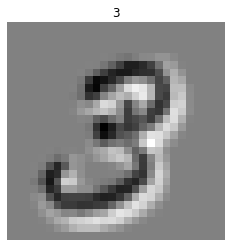

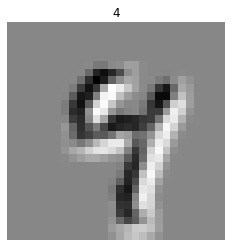

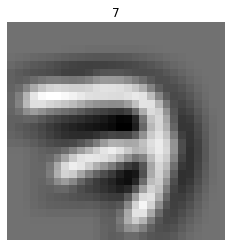

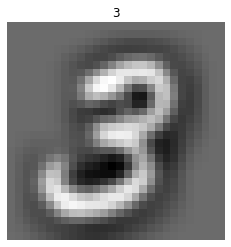

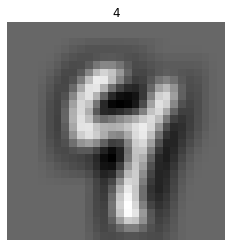

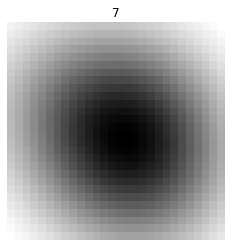

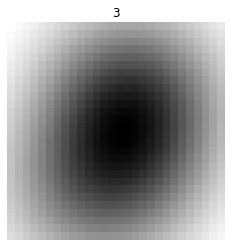

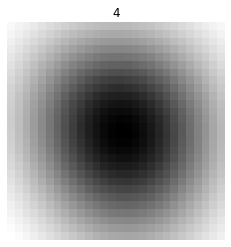

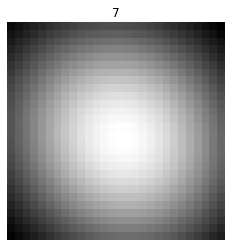

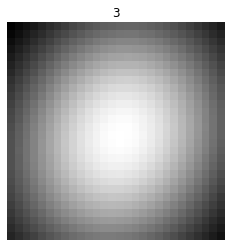

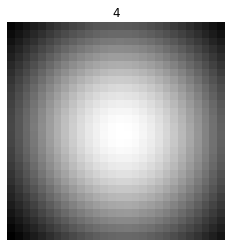

In [0]:
 for i in range(3):
    plt.figure()
    plt.imshow( np.reshape(moff_train[i], (28,28)),cmap="gray")
    plt.axis('off')
    plt.title(str(np.argmax(training_data.labels[i])));
    
for i in range(3):
    plt.figure()
    plt.imshow( np.reshape(mon_train[i], (28,28)),cmap="gray")
    plt.axis('off')
    plt.title(str(np.argmax(training_data.labels[i])));
    
for i in range(3):
    plt.figure()
    plt.imshow( np.reshape(poff_train[i], (28,28)),cmap="gray")
    plt.axis('off')
    plt.title(str(np.argmax(training_data.labels[i])));
    
for i in range(3):
    plt.figure()
    plt.imshow( np.reshape(pon_train[i], (28,28)),cmap="gray")
    plt.axis('off')
    plt.title(str(np.argmax(training_data.labels[i])));

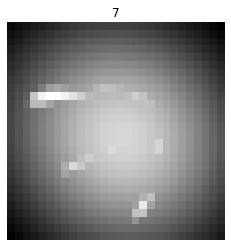

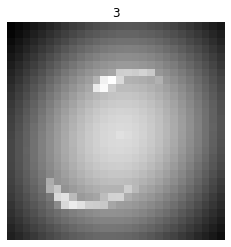

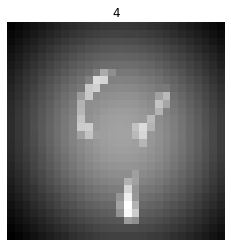

In [0]:
final_train = []
for k in range(len(pon_train)):
  img = np.zeros((28,28))
  img1 = np.reshape(pon_train[k], (28,28))
  img2 = np.reshape(poff_train[k], (28,28))
  img3 = np.reshape(mon_train[k], (28,28))
  img4 = np.reshape(moff_train[k], (28,28))
  for i in range(28):
    for j in range(28):
      max_val = max( max(img1[i][j], img2[i][j]), max(img3[i][j], img4[i][j]) )
      img[i][j] = max_val
  final_train.append(img)

final_test = []
for k in range(len(pon_train)):
  img = np.zeros((28,28))
  img1 = np.reshape(pon_test[k], (28,28))
  img2 = np.reshape(poff_test[k], (28,28))
  img3 = np.reshape(mon_test[k], (28,28))
  img4 = np.reshape(moff_test[k], (28,28))
  for i in range(28):
    for j in range(28):
      max_val = max( max(img1[i][j], img2[i][j]), max(img3[i][j], img4[i][j]) )
      img[i][j] = max_val
  final_test.append(img)

for i in range(3):
    plt.figure()
    plt.imshow( np.reshape(final_train[i], (28,28)),cmap="gray")
    plt.axis('off')
    plt.title(str(np.argmax(training_data.labels[i])));

In [0]:
foveal_filter = off_midget       # options: off_midget, on_midget, off_parasol, on_parasol
filtered_train = []
modulus = training_data.images.shape[0]
for i in training_data.images:
  img = np.reshape(i, (28,28) )
  img = correlate(img, foveal_filter, mode='constant')
  filtered_train.append( np.reshape( img,(784,)) )
  
filtered_test = []
for i in testing_data.images:
  img = np.reshape(i, (28,28) )
  img = correlate(img, foveal_filter, mode='constant')
  filtered_test.append( np.reshape( img,(784,)) )
  
train_features = np.asarray(filtered_train, dtype=np.float32)
train_labels = np.asarray(training_data.labels, dtype=np.float32)
test_features = np.asarray(filtered_test, dtype=np.float32)
test_labels = np.asarray(testing_data.labels, dtype=np.float32)

In [0]:
# lif parameters
lif_neurons = nengo.LIF(amplitude=0.01)
softlif_neurons = nengo_dl.SoftLIFRate(amplitude=0.01, sigma=0.001)
ens_params = dict(max_rates=nengo.dists.Choice([100]), intercepts=nengo.dists.Choice([0]))
n_filt = 1

def build_network(neuron_type, output_synapse=None):
  with nengo.Network() as net:
        nengo_dl.configure_settings(trainable=False)

        # the input node that will be used to feed in input images
        inp = nengo.Node([0] * 28 * 28)

        # add the first convolutional layer
        x = nengo_dl.tensor_layer(inp, tf.layers.conv2d, shape_in=(28, 28, 1), filters=8 * n_filt, kernel_size=3, strides=1, padding='SAME')
        x = nengo_dl.tensor_layer(x, neuron_type, **ens_params)

        # add a pooling layer
        x = nengo_dl.tensor_layer(x, tf.layers.average_pooling2d, shape_in=(28, 28, 8), pool_size=2, strides=2)

        # add another convolutional layer
        x = nengo_dl.tensor_layer(x, tf.layers.conv2d, shape_in=(14, 14, 8), filters=16 * n_filt, kernel_size=3, strides=1, padding='SAME')
        x = nengo_dl.tensor_layer(x, neuron_type, **ens_params)

        # add a pooling layer
        x = nengo_dl.tensor_layer(x, tf.layers.average_pooling2d, shape_in=(14, 14, 16), pool_size=2, strides=2)

        # another convolutional layer
        x = nengo_dl.tensor_layer(x, tf.layers.conv2d, shape_in=(7, 7, 16),filters=32 * n_filt, kernel_size=3, strides=1, padding='SAME')
        x = nengo_dl.tensor_layer(x, neuron_type, **ens_params)

        # another pooling layer
        x = nengo_dl.tensor_layer(x, tf.layers.average_pooling2d, shape_in=(7, 7, 32),pool_size=2, strides=2)

        # linear readout
        x = nengo_dl.tensor_layer(x, tf.layers.dense, units=10)
        p = nengo.Probe(x, synapse=output_synapse)

  return net, inp, p

In [17]:
# construct the network
net, inp, out_p = build_network(softlif_neurons)

# construct the simulator
minibatch_size = 50
sim = nengo_dl.Simulator(net, minibatch_size = minibatch_size)

# add the single timestep to the training data
train_data = {inp: train_features[:, None, :], out_p: train_labels[:, None, :]}
test_data = {inp:  test_features[:minibatch_size*2, None, :], out_p: test_labels[:minibatch_size*2, None, :]}

def objective(x, y):
    return tf.nn.softmax_cross_entropy_with_logits_v2(logits=x, labels=y)
  
opt = tf.train.RMSPropOptimizer(learning_rate=0.001)

def classification_acc(outputs, targets):
    return 100 * (1 - tf.reduce_mean(tf.cast(tf.not_equal(tf.argmax(outputs[:, -1], axis=-1), tf.argmax(targets[:, -1], axis=-1)), tf.float32)))

print("accuracy before training: %.2f%%" % sim.loss(test_data, {out_p: classification_acc}))
sim.train(train_data, opt, objective={out_p: objective}, n_epochs=6)
sim.save_params("./mnist_params")
sim.close()

Building network
Build finished in 0:00:00 
Optimization finished in 0:00:00                                               
|#########Constructing graph: creating base arrays (29%)         | ETA: 0:00:00

/usr/local/lib/python3.6/dist-packages/nengo_dl/simulator.py:134: UserWarning: No GPU support detected. It is recommended that you install tensorflow-gpu (`pip install tensorflow-gpu`).
  "No GPU support detected. It is recommended that you "


Construction finished in 0:00:01                                               
Calculation finished in 0:00:00                                                
accuracy before training: 14.00%
Training finished in 0:02:14 (loss: 1.4744)                                    


In [18]:
net, inp, out_p = build_network(lif_neurons, output_synapse=0.1)
sim = nengo_dl.Simulator(net, minibatch_size=minibatch_size, unroll_simulation=10)
sim.load_params("./mnist_params")

n_steps = 60
test_data = {inp: np.tile(test_features[:minibatch_size*2, None, :], (1, n_steps, 1)), out_p: np.tile(test_labels[:minibatch_size*2, None, :], (1, n_steps, 1))}
print("spiking neuron accuracy: %.2f%%" % sim.loss(test_data, {out_p: classification_acc}))

Building network
Build finished in 0:00:00 
Optimization finished in 0:00:00                                               
|         Constructing graph: creating base arrays (0%)        | ETA:  --:--:--

/usr/local/lib/python3.6/dist-packages/nengo_dl/simulator.py:134: UserWarning: No GPU support detected. It is recommended that you install tensorflow-gpu (`pip install tensorflow-gpu`).
  "No GPU support detected. It is recommended that you "


Construction finished in 0:00:04                                               
Calculation finished in 0:00:03                                                
spiking neuron accuracy: 99.00%


Simulation finished in 0:00:02                                                 


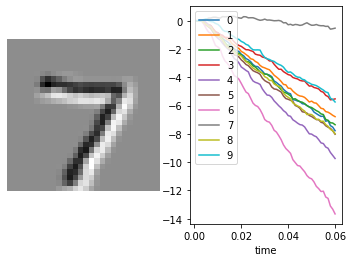

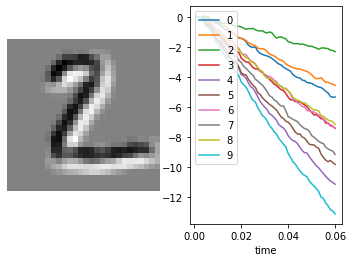

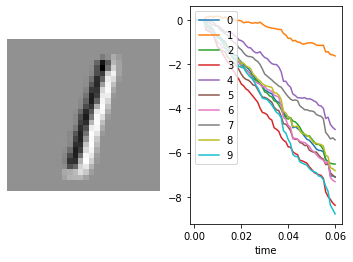

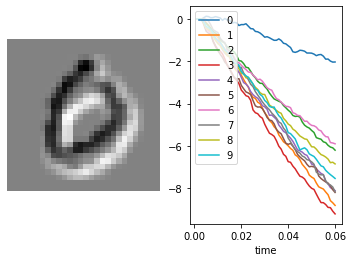

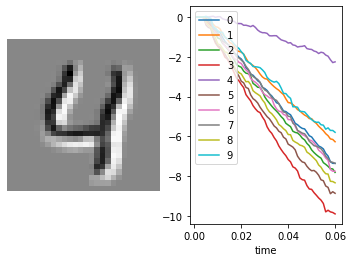

In [19]:
sim.run_steps(n_steps, data={inp: test_data[inp][:minibatch_size]})

for i in range(5):
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(np.reshape(test_data[inp][i, 0], (28, 28)),cmap="gray")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.plot(sim.trange(), sim.data[out_p][i])
    plt.legend([str(i) for i in range(10)], loc="upper left")
    plt.xlabel("time")

sim.close()